In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('C:\\Users\\JohnVinodhA\\Downloads\\Churn_Modelling.csv')

In [14]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [21]:
df= data.copy()
churn = df[df["Exited"] == 1]

## Exploratory Data Analysis

In [46]:
churn.groupby("Gender").agg({"Exited": "count"})
# Female have more exits

Exited
Gender        
Female    1139
Male       898

In [27]:
churn.groupby("Geography").agg({"Exited": "count"})
#Germany has more exits

Exited
Geography        
France        810
Germany       814
Spain         413

In [44]:
#Look at the summary of the Credit Score, Age, Tenure, Balance, Credit Card, Active member, Salary
df.groupby("Exited").agg(["min","mean","max"])

RowNumber                     CustomerId                          \
             min         mean    max        min          mean       max   
Exited                                                                    
0              2  5024.694964  10000   15565701  1.569117e+07  15815690   
1              1  4905.917526   9999   15565706  1.569005e+07  15815656   

       CreditScore                  Age                Tenure                \
               min        mean  max min       mean max    min      mean max   
Exited                                                                        
0              405  651.853196  850  18  37.408389  92      0  5.033279  10   
1              350  645.351497  850  18  44.837997  84      0  4.932744  10   

       Balance                          NumOfProducts               HasCrCard  \
           min          mean        max           min      mean max       min   
Exited                                                                          
0          0.0  72745.296779  221532.80             1  1.544267   3         0   
1          0.0  91108.539337  250898.09             1  1.475209   4         0   

                     IsActiveMember               EstimatedSalary  \
            mean max            min      mean max             min   
Exited                                                              
0       0.707146   1              0  0.554565   1           90.07   
1       0.699067   1              0  0.360825   1           11.58   

                                  
                 mean        max  
Exited                            
0        99738.391772  199992.48  
1       101465.677531  199808.10

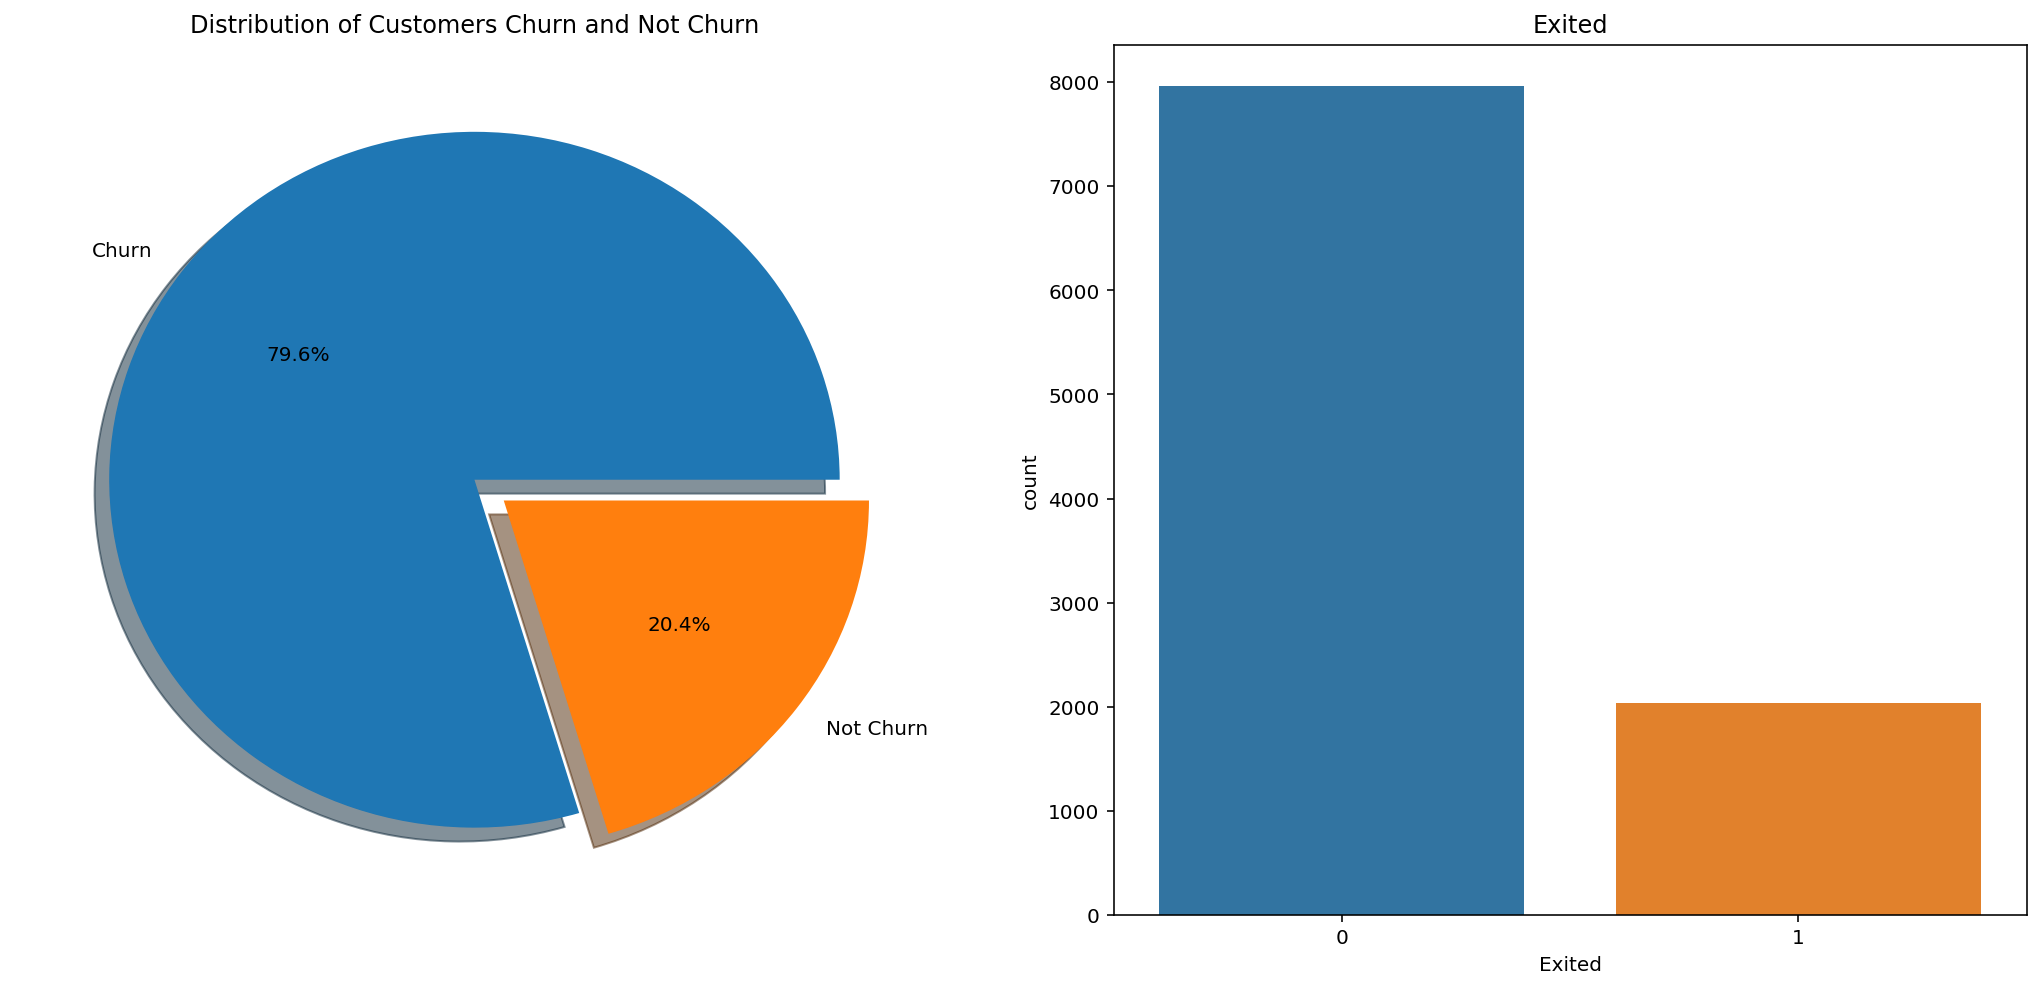

In [54]:
labels = 'Churn', 'Not Churn'
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=labels,ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Customers Churn and Not Churn')
ax[0].set_ylabel('')
sns.countplot('Exited',data=df,ax=ax[1])
ax[1].set_title('Exited')
plt.show()

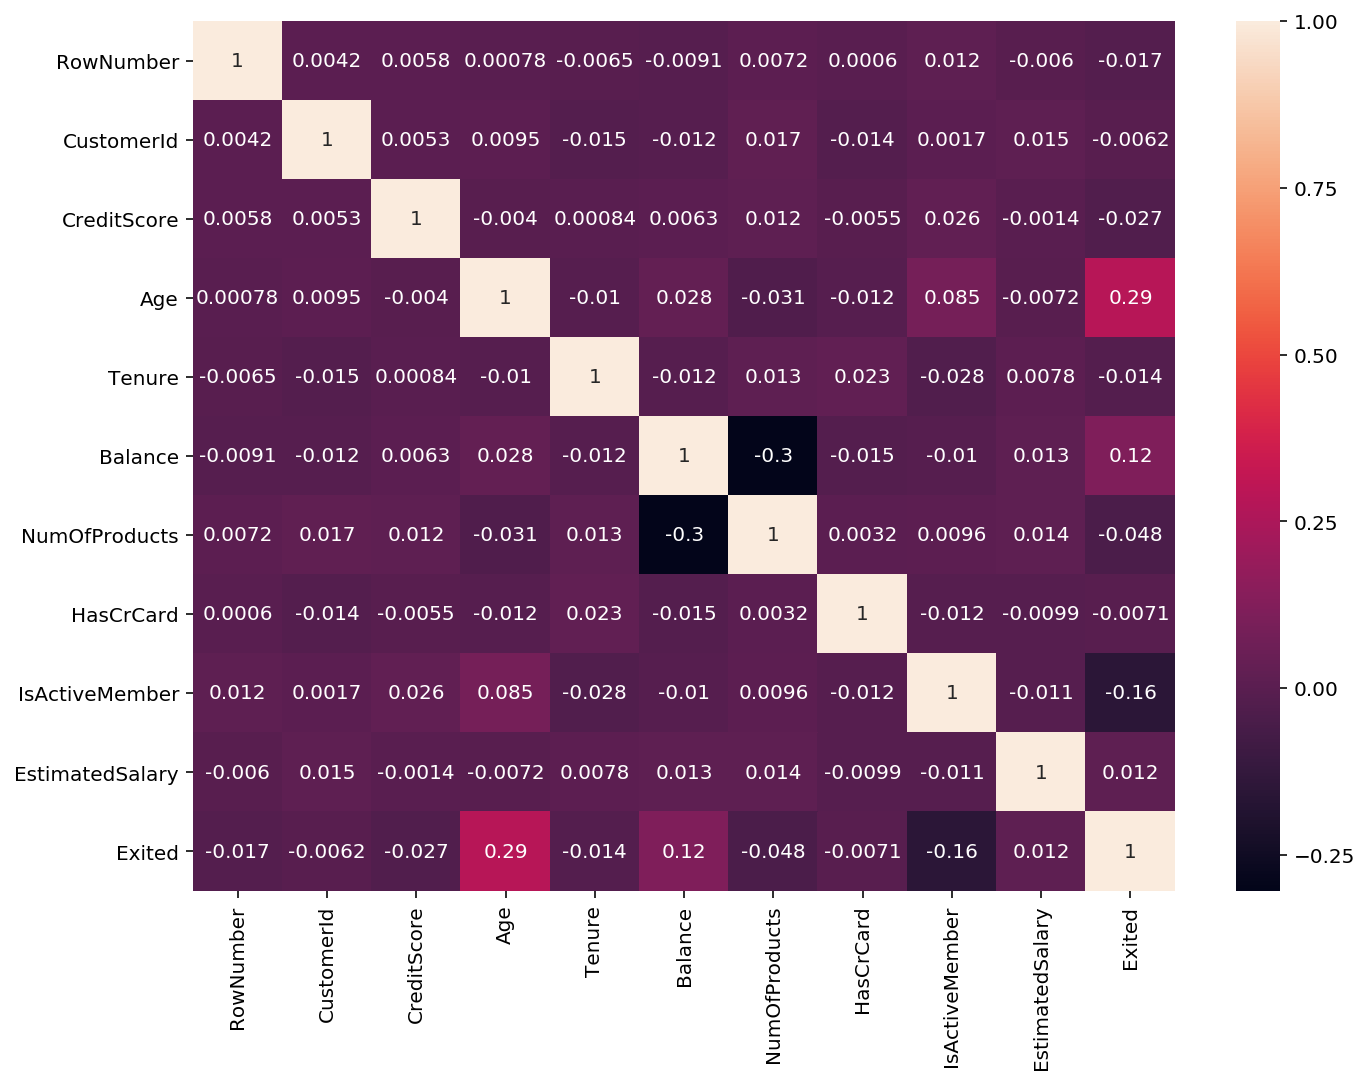

In [56]:
f, ax = plt.subplots(figsize=(11, 8)) 
sns.heatmap(df.corr(),annot=True)

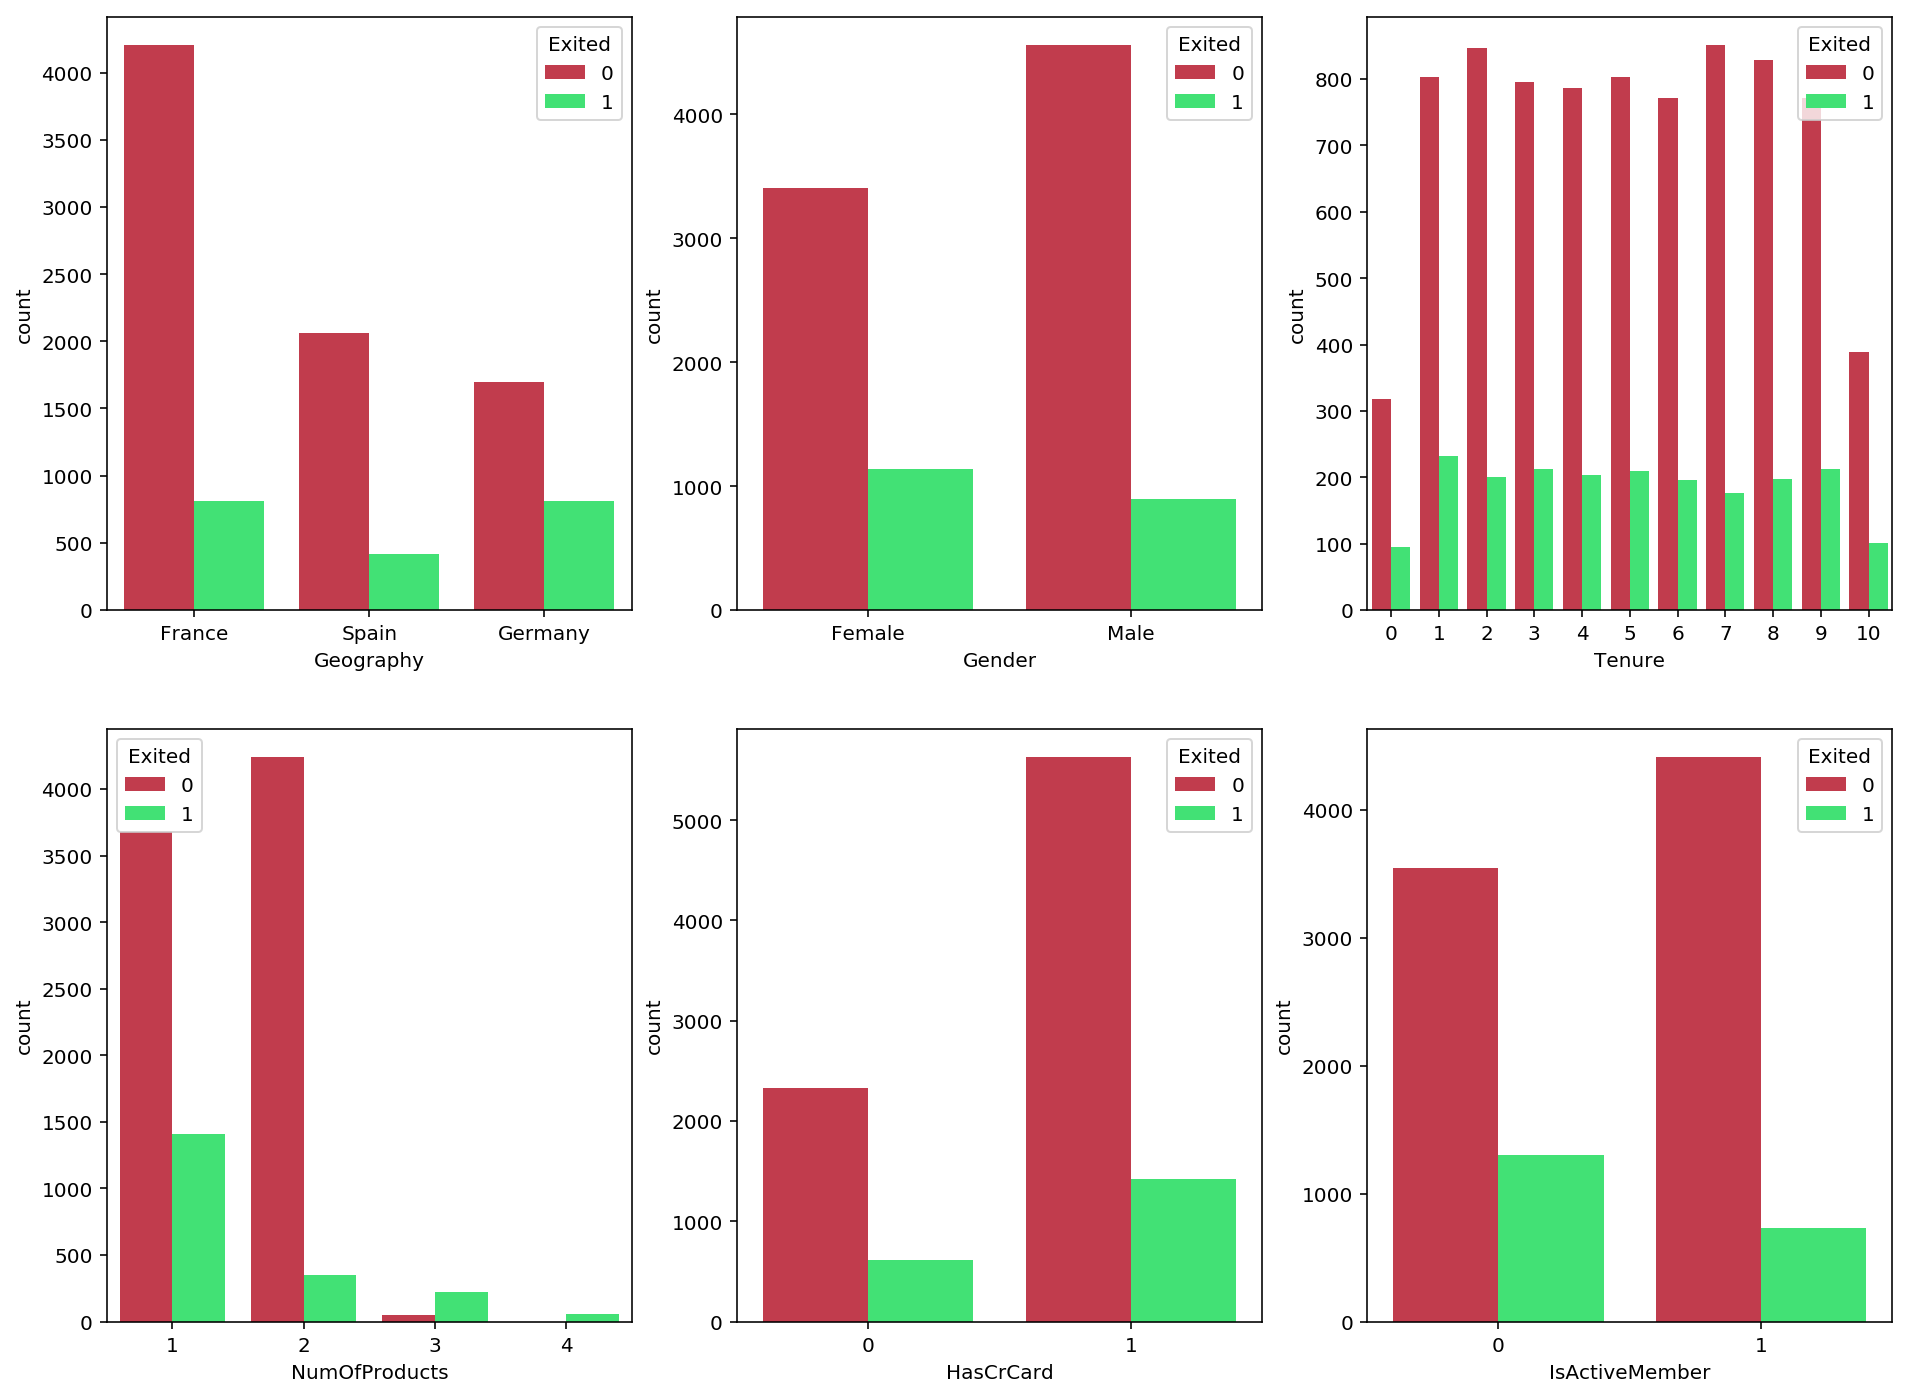

In [58]:
#Putting all the above results in a single visualization

fig_data=['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 
                  'IsActiveMember']
q=1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(df[j],hue=df.Exited, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

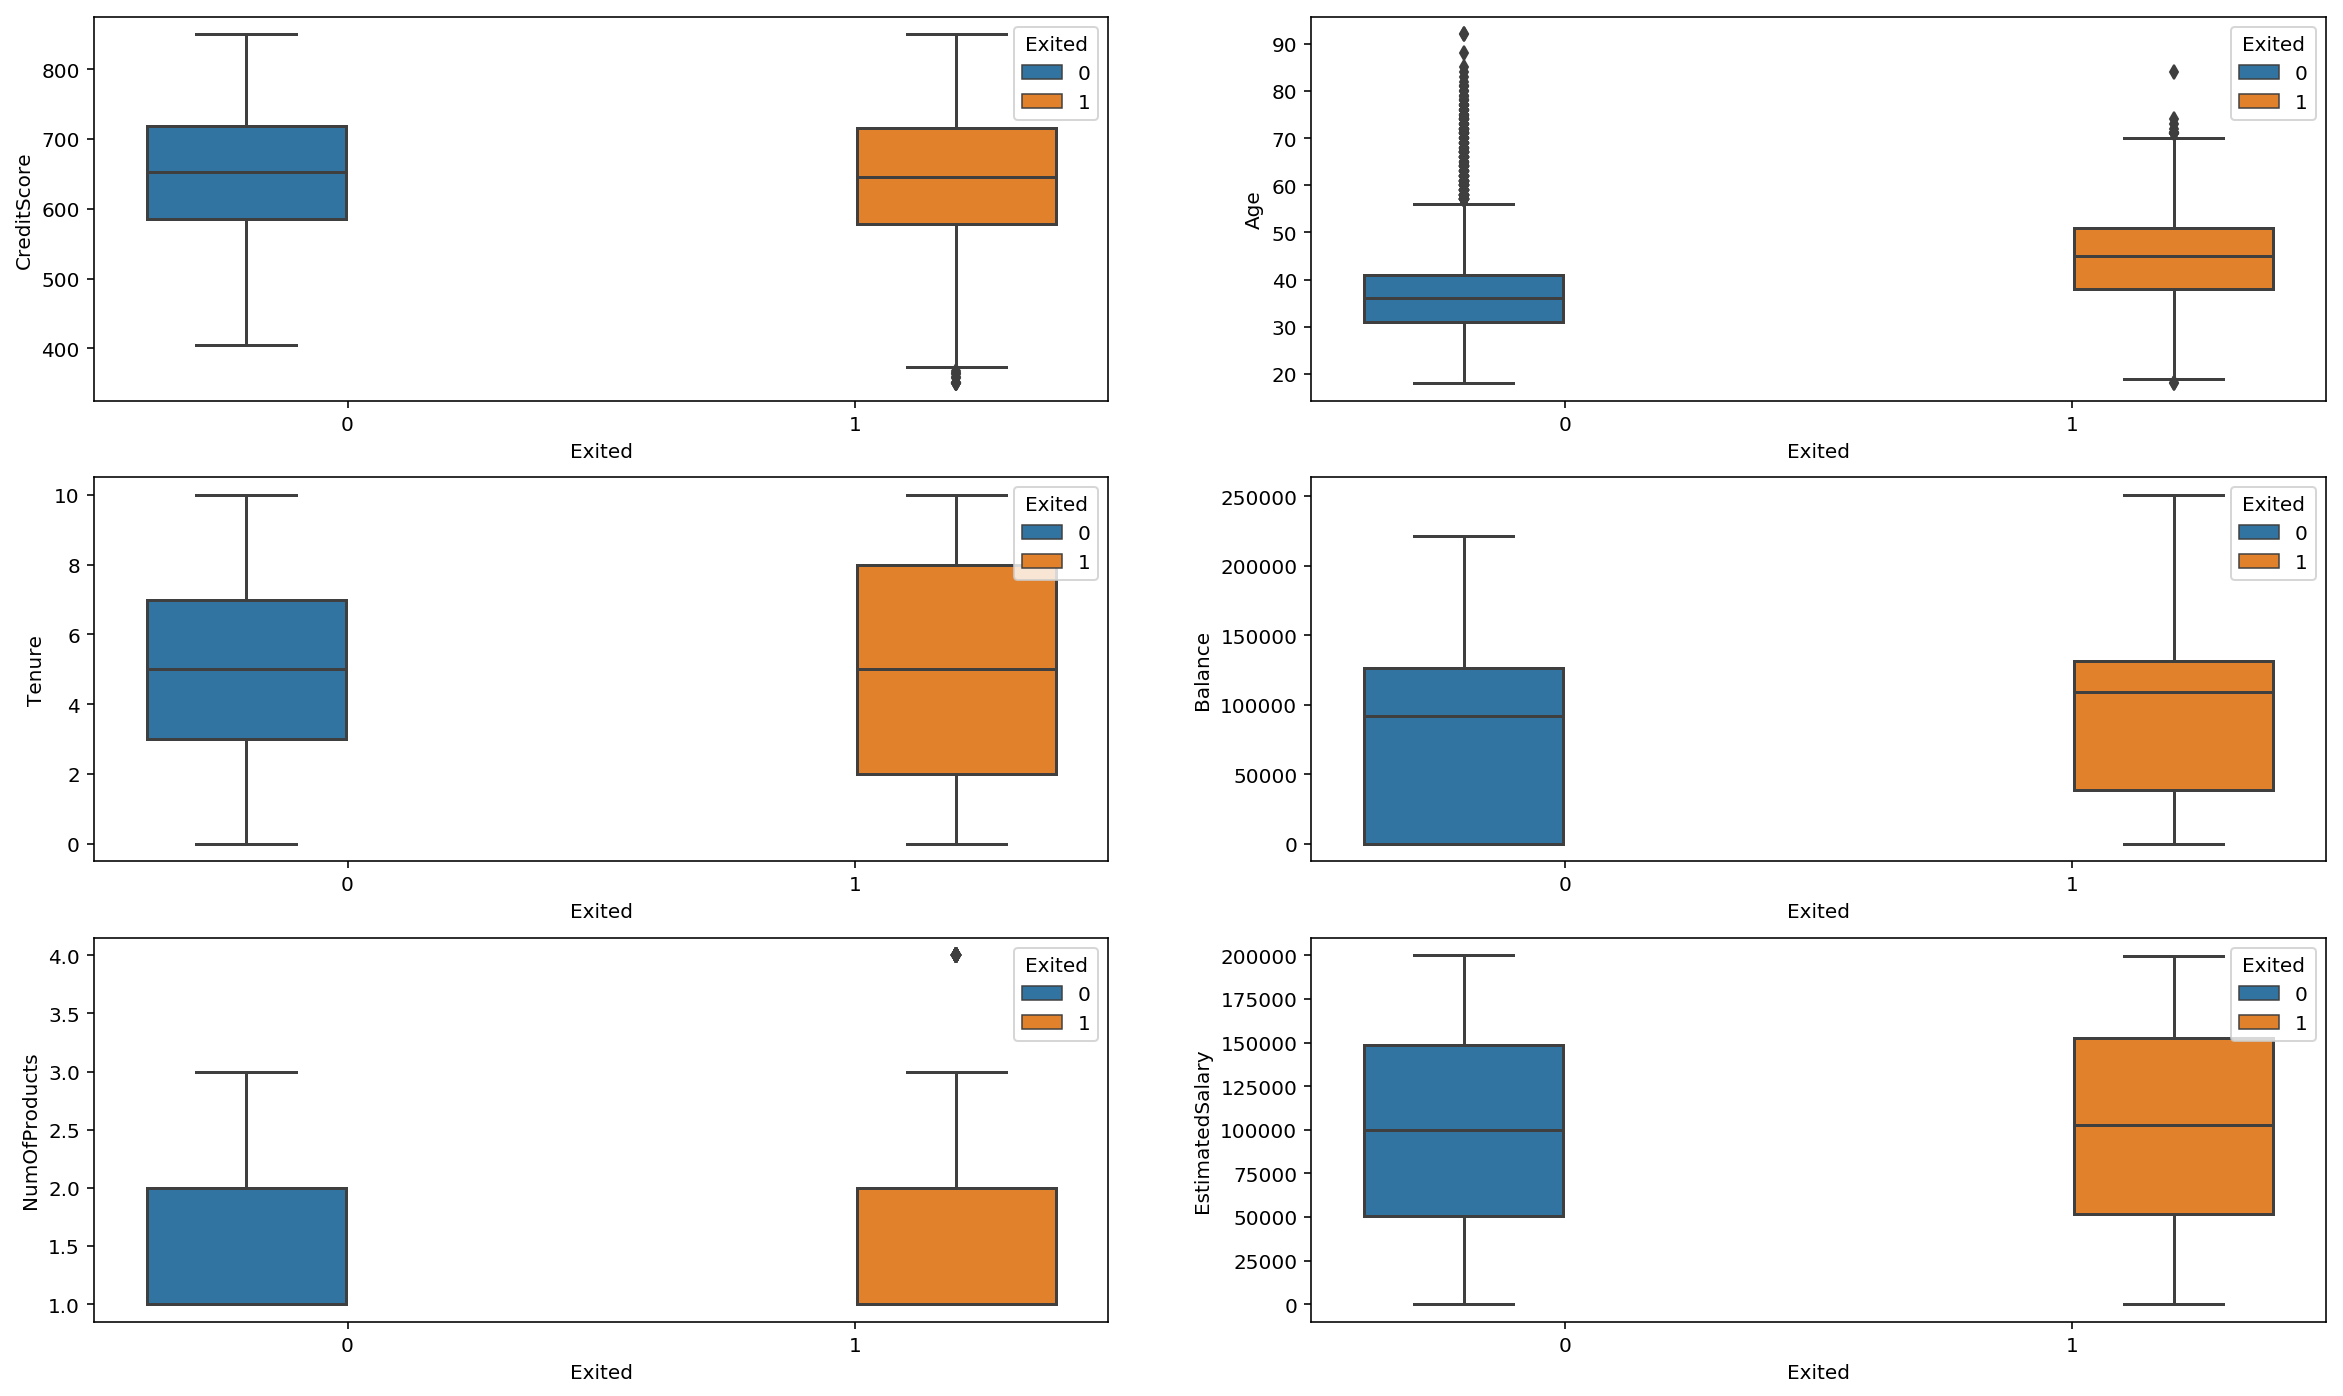

In [81]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])


## Data Preprocessing

In [77]:
df.drop(labels=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)


In [79]:
#One Hot encoding
df = pd.get_dummies(df, columns =["Geography", "Gender"], drop_first = False)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [125]:
y= df['Exited']
cat_df = df[["Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"]]
X= df.drop(labels=["Exited","Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"],axis=1)

In [104]:
X.iloc[:,0:3]

CreditScore  Age  Tenure
0             619   42       2
1             608   41       1
2             502   42       8
3             699   39       1
4             850   43       2
5             645   44       8
6             822   50       7
7             376   29       4
8             501   44       4
9             684   27       2
10            528   31       6
11            497   24       3
12            476   34      10
13            549   25       5
14            635   35       7
15            616   45       3
16            653   58       1
17            549   24       9
18            587   45       6
19            726   24       6
20            732   41       8
21            636   32       8
22            510   38       4
23            669   46       3
24            846   38       5
25            577   25       3
26            756   36       2
27            571   44       9
28            574   43       3
29            411   29       0
30            591   39       3
31            533   36       7
32            553   41       9
33            520   42       6
34            722   29       9
35            475   45       0
36            490   31       3
37            804   33       7
38            850   36       7
39            582   41       6
40            472   40       4
41            465   51       8
42            556   61       2
43            834   49       2
44            660   61       5
45            776   32       4
46            829   27       9
47            637   39       9
48            550   38       2
49            776   37       2
50            698   44      10
51            585   36       5
52            788   33       5
53            655   41       8
54            601   42       1
55            619   43       1
56            656   45       5
57            725   19       0
58            511   66       4
59            614   51       4
60            742   35       5
61            687   27       9
62            555   33       1
63            684   56       8
64            603   26       4
65            751   36       6
66            581   34       1
67            735   43      10
68            661   35       5
69            675   21       8
70            738   58       2
71            813   29       6
72            657   37       0
73            604   25       5
74            519   36       9
75            735   21       1
76            664   55       8
77            678   32       9
78            757   33       5
79            416   41      10
80            665   34       1
81            777   32       2
82            543   36       3
83            506   34       4
84            493   46       4
85            652   75      10
86            750   22       3
87            729   30       9
88            646   46       4
89            635   28       3
90            647   44       5
91            808   45       7
92            524   36      10
93            769   29       8
94            730   42       4
95            515   35      10
96            773   41       9
97            814   29       8
98            710   22       8
99            413   34       9
100           665   40       6
101           623   44       6
102           738   31       9
103           528   36       7
104           670   65       1
105           622   46       4
106           582   32       1
107           785   36       2
108           605   33       5
109           479   35       9
110           685   30       3
111           538   39       7
112           562   42       2
113           675   36       9
114           721   28       9
115           628   30       9
116           668   37       6
117           506   41       1
118           524   31       8
119           699   34       4
120           828   34       8
121           674   39       6
122           656   39       6
123           684   48      10
124           625   28       3
125           432   42       9
126           549   52       1
127           625   56       0
128    

In [111]:
X[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]]

CreditScore  Age  Tenure    Balance  EstimatedSalary
0             619   42       2       0.00        101348.88
1             608   41       1   83807.86        112542.58
2             502   42       8  159660.80        113931.57
3             699   39       1       0.00         93826.63
4             850   43       2  125510.82         79084.10
5             645   44       8  113755.78        149756.71
6             822   50       7       0.00         10062.80
7             376   29       4  115046.74        119346.88
8             501   44       4  142051.07         74940.50
9             684   27       2  134603.88         71725.73
10            528   31       6  102016.72         80181.12
11            497   24       3       0.00         76390.01
12            476   34      10       0.00         26260.98
13            549   25       5       0.00        190857.79
14            635   35       7       0.00         65951.65
15            616   45       3  143129.41         64327.26
16            653   58       1  132602.88          5097.67
17            549   24       9       0.00         14406.41
18            587   45       6       0.00        158684.81
19            726   24       6       0.00         54724.03
20            732   41       8       0.00        170886.17
21            636   32       8       0.00        138555.46
22            510   38       4       0.00        118913.53
23            669   46       3       0.00          8487.75
24            846   38       5       0.00        187616.16
25            577   25       3       0.00        124508.29
26            756   36       2  136815.64        170041.95
27            571   44       9       0.00         38433.35
28            574   43       3  141349.43        100187.43
29            411   29       0   59697.17         53483.21
30            591   39       3       0.00        140469.38
31            533   36       7   85311.70        156731.91
32            553   41       9  110112.54         81898.81
33            520   42       6       0.00         34410.55
34            722   29       9       0.00        142033.07
35            475   45       0  134264.04         27822.99
36            490   31       3  145260.23        114066.77
37            804   33       7   76548.60         98453.45
38            850   36       7       0.00         40812.90
39            582   41       6   70349.48        178074.04
40            472   40       4       0.00         70154.22
41            465   51       8  122522.32        181297.65
42            556   61       2  117419.35         94153.83
43            834   49       2  131394.56        194365.76
44            660   61       5  155931.11        158338.39
45            776   32       4  109421.13        126517.46
46            829   27       9  112045.67        119708.21
47            637   39       9  137843.80        117622.80
48            550   38       2  103391.38         90878.13
49            776   37       2  103769.22        194099.12
50            698   44      10  116363.37        198059.16
51            585   36       5  146050.97         86424.57
52            788   33       5       0.00        116978.19
53            655   41       8  125561.97        164040.94
54            601   42       1   98495.72         40014.76
55            619   43       1  125211.92        113410.49
56            656   45       5  127864.40         87107.57
57            725   19       0   75888.20         45613.75
58            511   66       4       0.00          1643.11
59            614   51       4   40685.92         46775.28
60            742   35       5  136857.00         84509.57
61            687   27       9  152328.88        126494.82
62            555   33       1   56084.69        178798.13
63            684   56       8   78707.16         99398.36
64            603   26       4  109166.37         92840.67
65            751   36       6  169831.46         27758.36
66            581   34       1  101633.04        1104

In [126]:
cols = X.columns
index = X.index

In [128]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,cat_df], axis = 1)
X.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -0.246269  0.416667   -0.75 -0.761480            0.0         0.011739   
1    -0.328358  0.333333   -1.00 -0.104906            0.0         0.125512   
2    -1.119403  0.416667    0.75  0.489346            2.0         0.139630   
3     0.350746  0.166667   -1.00 -0.761480            1.0        -0.064717   
4     1.477612  0.500000   -0.75  0.221806            0.0        -0.214561   

   Geography_Germany  Geography_France  Geography_Spain  Gender_Male  \
0                  0                 1                0            0   
1                  0                 0                1            0   
2                  0                 1                0            0   
3                  0                 1                0            0   
4                  0                 0                1            0   

   Gender_Female  HasCrCard  IsActiveMember  
0              1          1               1  
1              1          0               1  
2              1          1               0  
3              1          0               0  
4              1          1               1

In [129]:
print(X.shape, y.shape)

(10000, 13) (10000,)


In [131]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=10101)

## Modelling

In [135]:
models = []
models.append(('LR', LogisticRegression(random_state = 10101)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 10101)))
models.append(('RF', RandomForestClassifier(random_state = 10101)))
models.append(('SVM', SVC(gamma='auto', random_state = 10101)))

# evaluate each model in turn
results = []
names = []

In [137]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.811000)
KNN: (0.836000)
CART: (0.786500)
RF: (0.851000)
SVM: (0.857500)


### Cross Validation

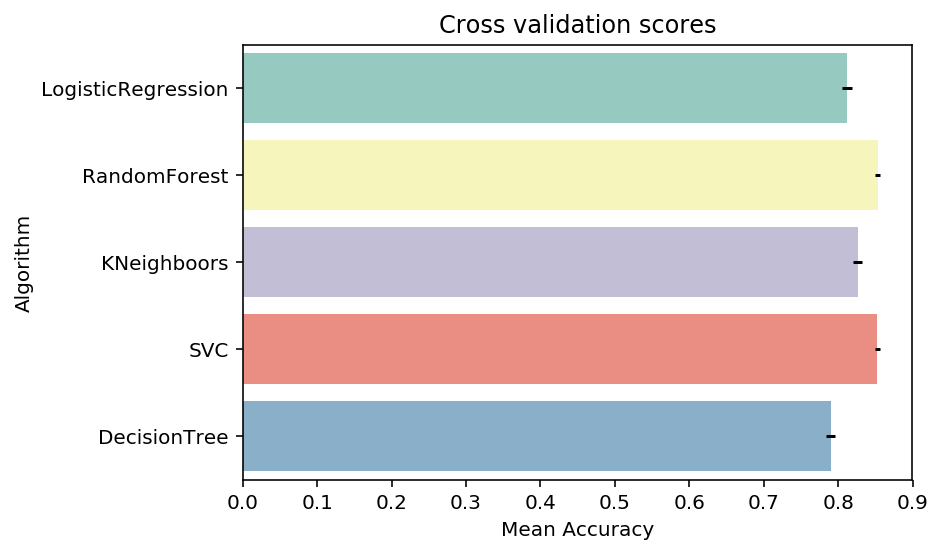

In [144]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","DecisionTree"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [147]:
cv_res[['CrossValMeans','Algorithm']]

CrossValMeans           Algorithm
0       0.811750  LogisticRegression
1       0.852875        RandomForest
2       0.826502         KNeighboors
3       0.852626                 SVC
4       0.789875        DecisionTree

In [ ]:
import itertools
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [158]:
rf = RandomForestClassifier(random_state = random_state)
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
scoring_metric='recall'
clf_rf = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train, y_train)

In [181]:
print(best_clf_rf)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10101, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50], 'criterion': ['entropy', 'gini'], 'bootstrap': [True], 'max_depth': [6], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [2, 3, 5], 'min_samples_split': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=False)


In [171]:
y_pred = best_clf_rf.predict(X_test)


Classification Report:

             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1604
          1       0.87      0.33      0.47       396

avg / total       0.86      0.86      0.83      2000


Confusion Matrix:
[[1585   19]
 [ 267  129]]


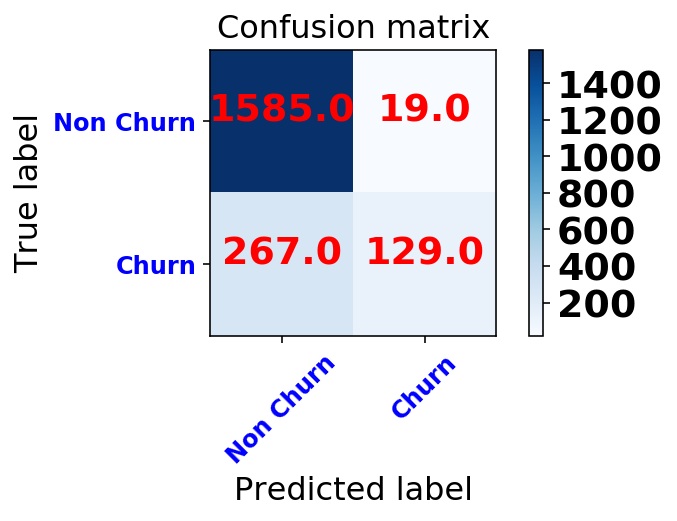

In [172]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Non Churn','Churn'],title='Confusion matrix')

In [185]:
rf1=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10101, verbose=0,
            warm_start=False)
feature_imp = pd.Series(rf1.fit(X_train, y_train).feature_importances_,
                        index=X.columns).sort_values(ascending=False)

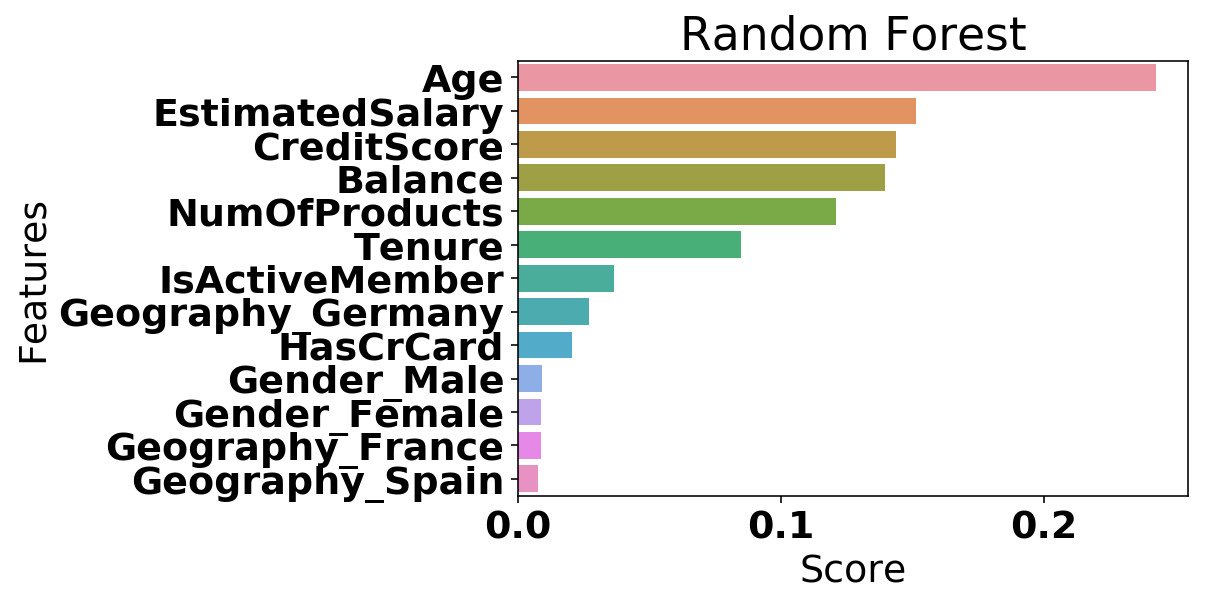

In [189]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Random Forest")
plt.show()

In [156]:
# SVC
SVM = SVC()


param_grid = {
                'C': [0.1, 1, 10], 
                'gamma': [0.01, 0.1, 1],
                'kernel': ['rbf']
}

gs_SVM = GridSearchCV(SVM, param_grid, cv=kfold, n_jobs=4)

gs_SVM.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
y_pred = gs_SVM.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1604
          1       0.82      0.42      0.55       396

avg / total       0.86      0.87      0.85      2000


Confusion Matrix:
[[1567   37]
 [ 230  166]]


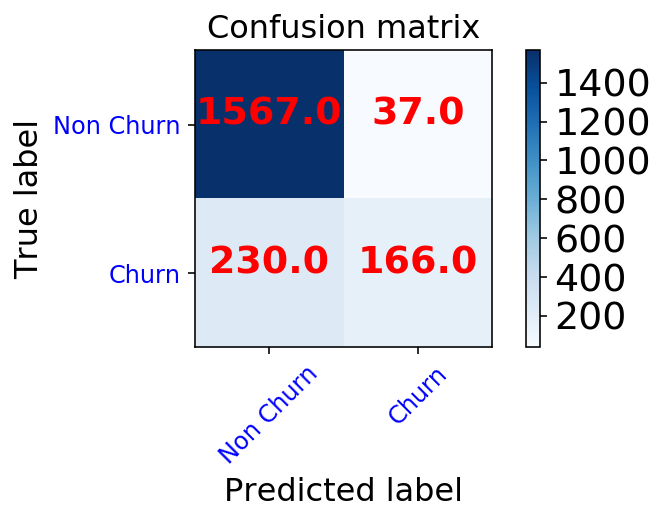

In [170]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Non Churn','Churn'],title='Confusion matrix')